In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('./events.csv', low_memory = False)

# Filtracion de columnas A (df_clean1)

In [20]:
df_clean1 = df.drop(['url','staticpage', 'city', 'country', 'operating_system_version', 'screen_resolution','browser_version'], axis = 1)

In [21]:
df_clean1.count()

timestamp           1011288
event               1011288
person              1011288
sku                  563838
model                564284
condition            563836
storage              563836
color                563836
skus                 221699
search_term           48967
campaign_source       82796
search_engine         50957
channel               87378
new_vs_returning      87378
region                87378
device_type           87378
dtype: int64

# Regiones con mas eventos
Reviso que regiones son las  que mas generan eventos
(*no filtre por ciudad porque me parecio muy poco representativo)
(*no filtre por paises porque es basicamente 100% brazil)

Text(0,0.5,'Region')

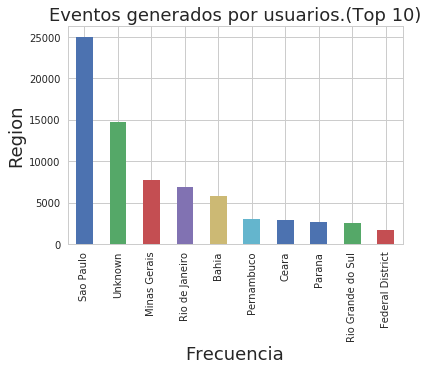

In [22]:
regions_vc = df_clean1['region'].value_counts().iloc[:10]

regions_graf = regions_vc.plot.bar()
regions_graf.set_title("Eventos generados por usuarios.(Top 10)", fontsize=18)
regions_graf.set_xlabel("Frecuencia", fontsize=18)
regions_graf.set_ylabel("Region", fontsize=18)

# Eventos que terminaron en ventas
Filtre el condicion y la modelo del producto (TOP 5)
Me parecio llamativo que productos en muy buen estado como los "Nuevos" y "Excelentes" 
tengan ventas tanto menores en comparacion con los de estado "Bueno"

In [23]:
ventas = df_clean1[(df_clean1.event == 'conversion')]
ventas = ventas.dropna(axis = 1, how = 'all')

model_vc = ventas['model'].value_counts().iloc[:5]
condition_vc = ventas['condition'].value_counts().iloc[:5]

ventas.count()

timestamp    1172
event        1172
person       1172
sku          1172
model        1172
condition    1172
storage      1172
color        1172
dtype: int64

Text(0,0.5,'Almacenamiento')

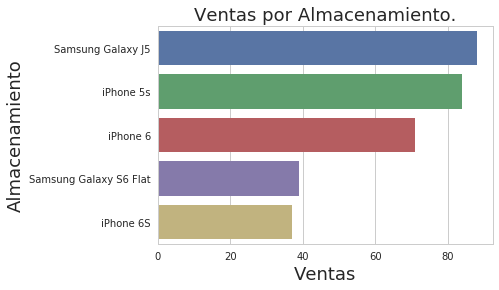

In [24]:
models_graf = sns.barplot(x=model_vc.values, y=model_vc.index)
models_graf.set_title("Ventas por Almacenamiento.", fontsize=18)
models_graf.set_xlabel("Ventas", fontsize=18)
models_graf.set_ylabel("Almacenamiento", fontsize=18)

Text(0,0.5,'Condicion')

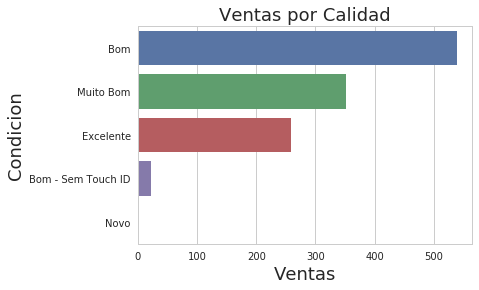

In [25]:
condition_graf = sns.barplot(x=condition_vc.values, y=condition_vc.index)
condition_graf.set_title("Ventas por Calidad", fontsize=18)
condition_graf.set_xlabel("Ventas", fontsize=18)
condition_graf.set_ylabel("Condicion", fontsize=18)

# Filtracion de columnas B (df_clean2)

In [41]:
df_clean2 = df[['timestamp','person','event','sku', 'url', 'model', 'condition', 'storage','search_term','campaign_source','channel','new_vs_returning','region','device_type']]

# Modelos mas visitados (TOP 10)
Busco cuales son los modelos mas visitados, para ver si hay correlacion con las compras, pedidos (leads), y los productos agregados a carritos/posibles ventas (checkouts) 

In [42]:
viewed = df_clean2[(df_clean2.event == 'viewed product')]
viewed = viewed.dropna(axis = 1, how = 'all')
viewed.head()

,timestamp,person,event,sku,model,condition,storage
2,2018-05-31 23:38:09,0004b0a2,viewed product,2694.0,iPhone 5s,Bom,32GB
4,2018-05-29 13:29:25,0006a21a,viewed product,15338.0,Samsung Galaxy S8,Bom,64GB
13,2018-04-09 20:13:14,000a54b2,viewed product,12661.0,Motorola Moto Z Play,Muito Bom,32GB
22,2018-05-24 11:27:47,000a54b2,viewed product,10254.0,iPhone 7 Plus,Excelente,256GB
26,2018-05-24 11:28:59,000a54b2,viewed product,6581.0,iPhone 6S,Bom,16GB


Text(0,0.5,'Modelo')

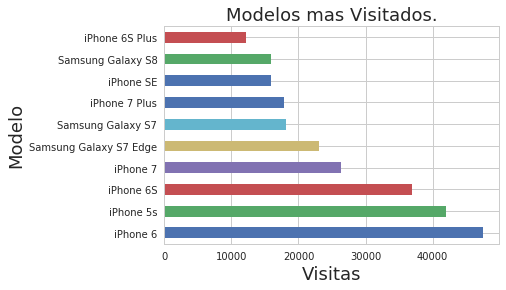

In [46]:
viewed_grouped = viewed.groupby(['model']).count().sort_values(['timestamp'], ascending=False).iloc[:10,:1]
viewed_grouped.columns = ['ammount']
viewed_serie = viewed_grouped.iloc[:,0]

viewed_graf = viewed_serie.plot.barh()
viewed_graf.set_title("Modelos mas Visitados.", fontsize=18)
viewed_graf.set_xlabel("Visitas", fontsize=18)
viewed_graf.set_ylabel("Modelo", fontsize=18)

# Modelos mas deseados(leads) (TOP 10)

In [47]:
leads = df_clean2[(df_clean2.event == 'lead')]
leads = leads.dropna(axis = 1, how = 'all')
leads.head()

,timestamp,person,event,model
3248,2018-04-17 22:11:19,01139919,lead,Samsung Galaxy On 7
6636,2018-04-07 11:37:11,01bca043,lead,iPhone 6 Plus
7036,2018-02-12 17:23:30,01db2fe6,lead,Samsung Galaxy J5
13041,2018-03-08 12:39:30,03767f8e,lead,iPhone 6
14203,2018-01-08 14:04:07,03bdcd81,lead,Samsung Galaxy S7 Edge


Text(0,0.5,'Modelo')

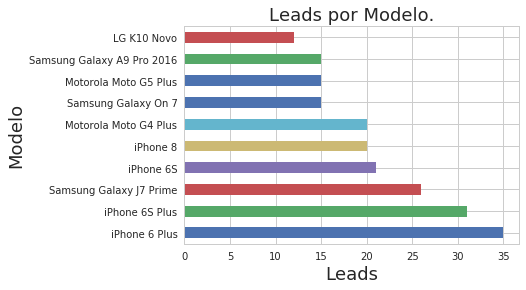

In [48]:
leads_grouped = leads.groupby(['model']).count().sort_values(['timestamp'], ascending=False).iloc[:10,:1]
leads_grouped.columns = ['ammount']
leads_serie = leads_grouped.iloc[:,0]

leads_graf = leads_serie.plot.barh()
leads_graf.set_title("Leads por Modelo.", fontsize=18)
leads_graf.set_xlabel("Leads", fontsize=18)
leads_graf.set_ylabel("Modelo", fontsize=18)

# Modelos agregados a checkout (TOP 10)

In [49]:
checkouts = df_clean2[(df_clean2.event == 'checkout')]
checkouts = checkouts.dropna(axis = 1, how = 'all')
checkouts.head()

,timestamp,person,event,sku,model,condition,storage
3,2018-05-31 23:38:40,0004b0a2,checkout,2694.0,iPhone 5s,Bom,32GB
7,2018-05-29 13:29:35,0006a21a,checkout,15338.0,Samsung Galaxy S8,Bom,64GB
44,2018-05-24 11:34:32,000a54b2,checkout,12660.0,Motorola Moto Z Play,Bom,32GB
85,2018-04-06 05:14:58,00184bf9,checkout,6355.0,Samsung Galaxy J5,Excelente,16GB
86,2018-04-06 05:18:15,00184bf9,checkout,6355.0,Samsung Galaxy J5,Excelente,16GB


Text(0,0.5,'Modelo')

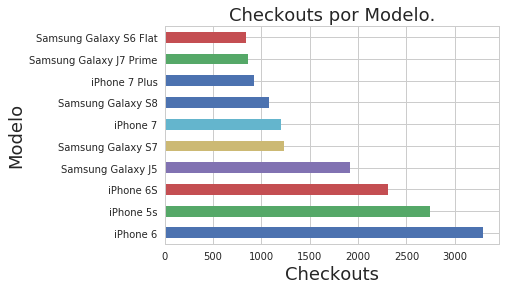

In [50]:
checkouts_grouped = checkouts.groupby(['model']).count().sort_values(['timestamp'], ascending=False).iloc[:10,:1]
checkouts_grouped.columns = ['ammount']

checkouts_serie = checkouts_grouped.iloc[:,0]

checkouts_graf = checkouts_serie.plot.barh()
checkouts_graf.set_title("Checkouts por Modelo.", fontsize=18)
checkouts_graf.set_xlabel("Checkouts", fontsize=18)
checkouts_graf.set_ylabel("Modelo", fontsize=18)

# Analisis de las campañas de Marketing

In [59]:
ad_hit = df_clean2[(df_clean2.event == 'ad campaign hit')]
ad_hit = ad_hit.dropna(axis = 1, how = 'all')
ad_hit.head(10)

,timestamp,person,event,url,campaign_source
0,2018-05-31 23:38:05,0004b0a2,ad campaign hit,/comprar/iphone/iphone-5s,criteo
6,2018-05-29 13:29:27,0006a21a,ad campaign hit,/comprar/samsung/galaxy-s8,criteo
11,2018-04-09 20:12:31,000a54b2,ad campaign hit,/,google
15,2018-05-24 11:21:07,000a54b2,ad campaign hit,/,google
99,2018-05-17 00:08:56,0019c395,ad campaign hit,/comprar/samsung/galaxy-j5,google
101,2018-05-17 00:11:10,0019c395,ad campaign hit,/comprar/samsung/galaxy-j5,google
107,2018-06-08 12:15:33,001bb7eb,ad campaign hit,/comprar/iphone/6,google
111,2018-05-29 12:56:08,001f1653,ad campaign hit,/comprar/samsung/galaxy-s6-flat,criteo
119,2018-01-31 16:54:29,00204059,ad campaign hit,/,FacebookAds
132,2018-02-01 23:32:02,00204059,ad campaign hit,/comprar/iphone,zanox


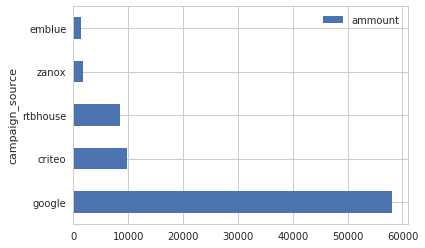

In [91]:
ad_grouped = ad_hit.groupby(['campaign_source']).count().sort_values(['timestamp'] , ascending = False).iloc[:5,:1]
ad_grouped.columns = ['ammount']
ad_grouped.plot.barh()